Automated Insurance Cost Prediction : Using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance_dataset=pd.read_csv('/content/insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [7]:
# smoker,sex,regions have to be converted into numerical from categorical

In [8]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-12-91008eb6dc20>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


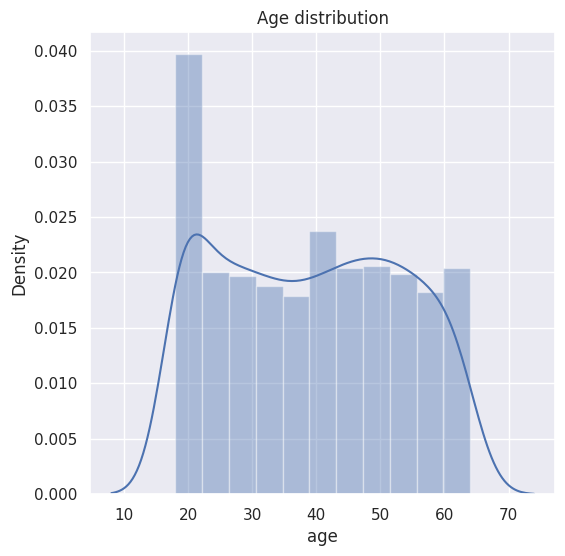

In [12]:
# Distribution of age values
sns.set() # grids etc deta hai seaborn mr
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()
# Density is directly proportional to number

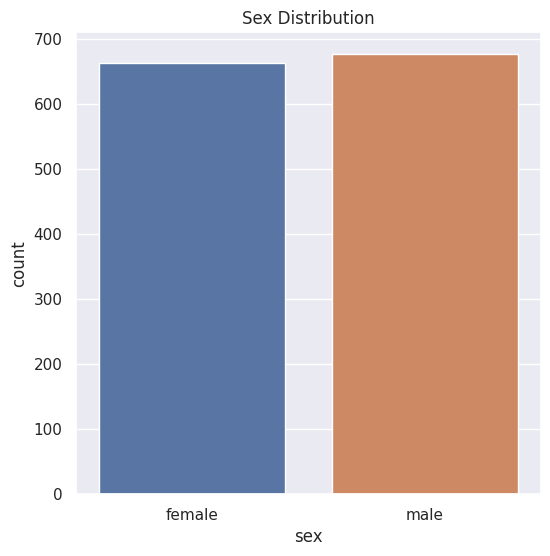

In [13]:
# gender column : sns.set ek bar likhna okay hai
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [15]:
insurance_dataset['sex'].value_counts()
# Almost equal distribution in sex

male      676
female    662
Name: sex, dtype: int64

<ipython-input-17-9df96d3a000e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


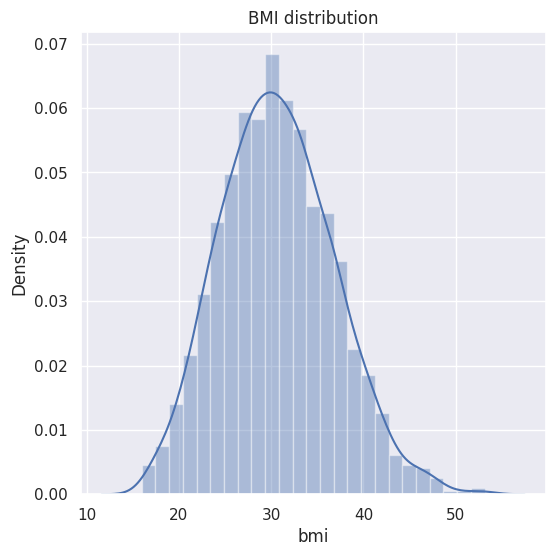

In [17]:
# BMI distribution
# Distribution of bmi values
# sns.set() # grids etc deta hai seaborn mr
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()
# Density is directly proportional to number
# perfect normal distribution
# normal BMI range : 18.5 to 24.9
# Lot of ppl are overwaited , About 30 mostly

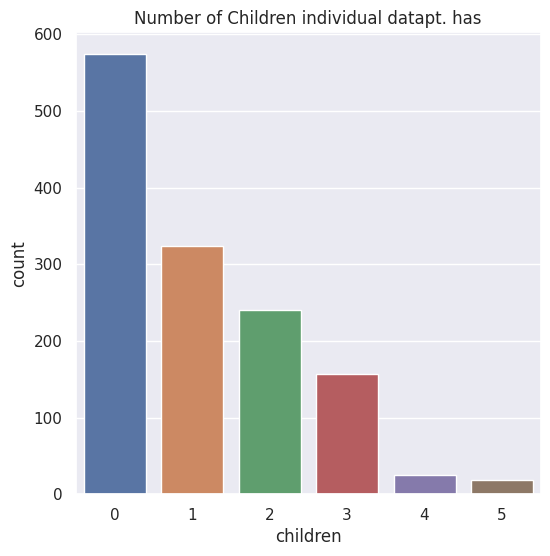

In [18]:
# Children Column : count plot
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Number of Children individual datapt. has')
plt.show()

In [19]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

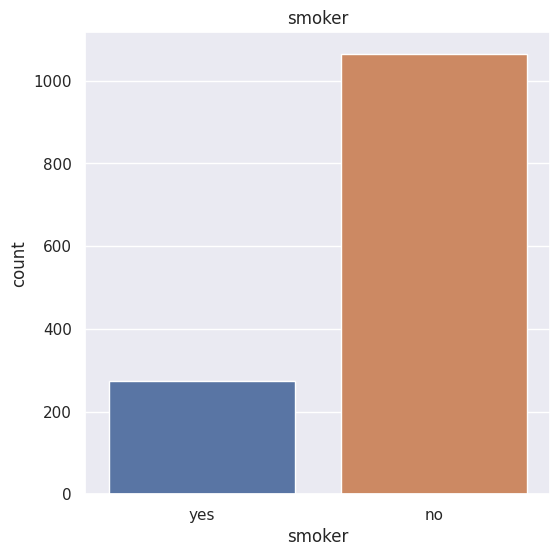

In [20]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()

In [21]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

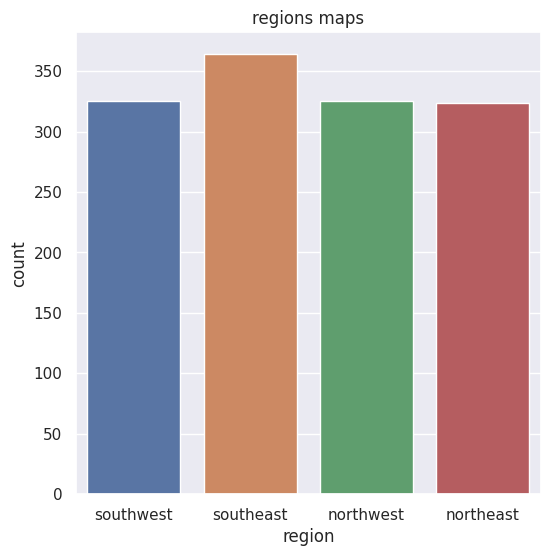

In [23]:
# Regions column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('regions maps')
plt.show()

<ipython-input-25-3ccaf8910c90>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


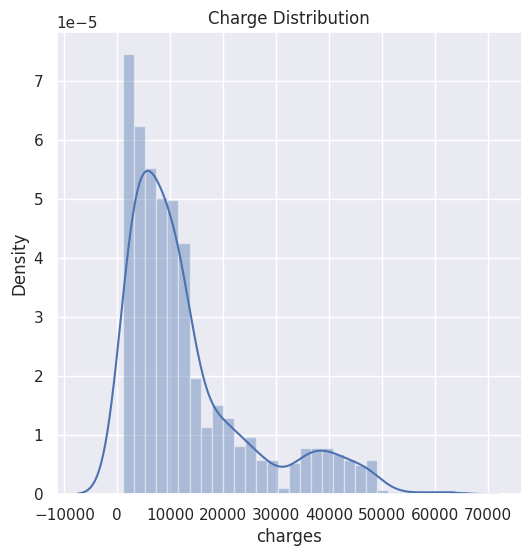

In [25]:
# distribution of insurance charge distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()
# mostly 0 to 10,000 dollers : ppl have chosen

In [28]:
# Data Preprocessing

In [29]:
# encoding the sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# encoding the 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# encoding the region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2, 'northwest':3}}, inplace=True)

In [31]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [32]:
# Splitting features ad target

In [33]:
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']

In [34]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [35]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [36]:
# Splitting the data into training and testing data

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [40]:
print(X.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [41]:
# Linear Regression Model Training

In [42]:
model = LinearRegression()

In [43]:
model.fit(x_train, y_train)

LinearRegression()

In [45]:
# Model Evaluation

In [46]:
training_data_prediction = model.predict(x_train)


In [47]:
test_data_prediction = model.predict(x_test)

In [48]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
r2_train

0.751505643411174

In [50]:
r2_test = metrics.r2_score(y_test, test_data_prediction) # it just compares actual and predicted and calculates R2 value
r2_test

0.7447273869684076

In [51]:
# Building a predictive system : to predict insurance charge based on given features of a person/dataset/row

In [52]:
x_test.head(1)

,age,sex,bmi,children,smoker,region
17,23,0,23.845,0,1,2


In [54]:
input_data=(44,1,14,4,1,4) # tuple
input=np.asarray(input_data)
input=input.reshape(1,-1) # 1 row vali table bana dega
# since prediction model needs table, not list or 1D array
print(model.predict(input))
# OR
regressor=model
prediction=regressor.predict(input)
print(prediction)
print(prediction[0])

[6316.54600073]
[6316.54600073]
6316.5460007264965


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#So insurance cost is USD 6316